In [ ]:
'''
# 한글 폰트 설치 런타임 재시작 이후 셀 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n# 한글 폰트 설치 런타임 재시작 이후 셀 실행\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

In [ ]:
# 현재 작업 디렉토리
!pwd

/content


In [ ]:
# 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 원하는 위치로 경로 바꾸기
# 본인이 만든 폴더 위치를 사용
%cd /content/drive/MyDrive/mulcama_bigdata

/content/drive/MyDrive/mulcama_bigdata


#### 패키지 설치 및 라이브러리 로드

In [ ]:
'''
!pip install pandas nltk
!pip install konlpy
!pip install wordcloud
'''

'\n!pip install pandas nltk\n!pip install konlpy\n!pip install wordcloud\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import nltk
import re
import matplotlib.font_manager as fm
import matplotlib as mpl
import warnings

from matplotlib import font_manager, rc
from scipy.stats import f_oneway
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from itertools import tee
from scipy.stats import chi2_contingency

from wordcloud import WordCloud
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# CSV 파일 읽기
df = pd.read_csv("./알리_베스트셀러_리뷰.csv", encoding='UTF-8') ; df.head(5)

,상품명,가격,평점,댓글,별점,링크
0,"SCVCN 사이클링 안경 자전거 선글라스, 남성 UV400 안경, 스포츠 MTB 야...","1,391",4.7,NaN,NaN,https://ko.aliexpress.com/item/100500592463696...
1,"역도 스트랩 실리콘 리프팅 손목 스트랩, 미끄럼 방지, 힘 훈련, 데드리프트 크로스...","1,391",4.8,배송은 생각보다 빨리도착했네요 손목 스트랩 1쌍~레드 디자인 이쁘고 마감처리 깔끔하...,5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5...,https://ko.aliexpress.com/item/100500592457862...
2,"야외 캠핑 생존 랜야드 낙하산 로프 하이킹 텐트 액세서리, 7 코어 550 파라코드...","1,125",4.7,감사합니다\n지퍼 손잡이 매듭용으로 좋습니다\n잘받았습니다 잘받았습니다\n이색인줄은...,5\n5\n5\n5\n5\n5\n5\n3\n5\n5\n5\n5\n4\n5\n4\n5...,https://ko.aliexpress.com/item/100500522141320...
3,"접이식 대용량 접이식 왜건, 휴대용 유틸리티 카트, 쇼핑 비치 가든 풀 트롤리, 야...","25,785",4.7,뭔 배송하면서 바닷물에 담궈서 가져오냐? 쓰기도 전에 녹슬어서 오는 메이드인 차이나...,5\n5\n5\n5\n5\n5\n4\n4\n5\n5\n5\n5\n5\n5\n5\n4...,https://ko.aliexpress.com/item/100500593200533...
4,"BISINNA 접이식 바베큐 라운드 테이블 스토브, 휴대용 캠핑 바베큐 숯 그릴, ...","16,411",4.8,생각보다 너무괜찮은데요? 후기좋은 이유가있엇네요 불판도생각보다 두껍고튼튼한듯ㅎ 저사...,5\n5\n5\n5\n5\n5\n5\n5\n5\n4\n5\n5\n5\n5\n5\n5...,https://ko.aliexpress.com/item/100500626084886...


# 데이터셋 살펴보기

In [ ]:
# dimension
df.shape

(291, 6)

In [ ]:
# 결측치
df.isnull().sum()

상품명     0
가격      0
평점      0
댓글     21
별점      5
링크      0
dtype: int64

In [ ]:
cond = df['댓글'].isnull()
df_clean = df.loc[~cond]


# 25개 제품의 null값이 존재하여 날림
# 25개의 제품 각각에 댓글을을 합산하여도 충분한 수치의 데이터 보유
# 25개의 제품의 null값은 댓글이 없고 별점도 없는 인덱스의 row이기 때문에 날리기로 함

In [ ]:
#결측지 제거 확인
df_clean.isnull().sum()

상품명    0
가격     0
평점     0
댓글     0
별점     0
링크     0
dtype: int64

In [ ]:
df_clean['댓글'].head()

1    배송은 생각보다 빨리도착했네요 손목 스트랩 1쌍~레드 디자인 이쁘고 마감처리 깔끔하...
2    감사합니다\n지퍼 손잡이 매듭용으로 좋습니다\n잘받았습니다 잘받았습니다\n이색인줄은...
3    뭔 배송하면서 바닷물에 담궈서 가져오냐? 쓰기도 전에 녹슬어서 오는 메이드인 차이나...
4    생각보다 너무괜찮은데요? 후기좋은 이유가있엇네요 불판도생각보다 두껍고튼튼한듯ㅎ 저사...
5    잘받았습니다\n좋아요 가격대비 만족합니다\n진짜 빨리받앗어요. 일주일?? 턱걸이하는...
Name: 댓글, dtype: object

In [ ]:
# 별점을 정수형 리스트로 변환
def split_stars(stars):
    return list(map(int, stars.split('\n')))

# 각 행에 대해 별점 리스트로 변환
df_clean['star_list'] = df_clean['별점'].apply(split_stars)

# 별점 분포를 계산하기 위한 별점 리스트 플래트닝
all_stars = [star for stars in df_clean['star_list'] for star in stars]

# 별점별 빈도 계산
star_counts = pd.Series(all_stars).value_counts().sort_index()

# 별점별 빈도 출력
print(star_counts)

# 부정은 1점 (373) + 2점 (219) + 3점 (468)
# 긍정은 4점 (1506) + 5점 (9385)

1     373
2     219
3     468
4    1506
5    9385
Name: count, dtype: int64


In [ ]:
def classify_sentiment(stars):
    # 별점을 정수형 리스트로 변환
    stars_list = list(map(int, stars.split('\n')))

    # 별점이 1, 2, 3 중 하나라도 있으면 부정, 모두 4 또는 5이면 긍정
    if any(star in [1, 2, 3] for star in stars_list):
        return '부정'
    elif all(star in [4, 5] for star in stars_list):
        return '긍정'
    else:
        return '알 수 없음'

In [ ]:
# 별점을 정수형 리스트로 변환
def split_stars(stars):
    return list(map(int, stars.split('\n')))


# 각 행에 대해 별점 리스트로 변환
df_clean['star_list'] = df_clean['별점'].apply(split_stars)

# 별점 리스트를 긍정/부정 리스트로 변환
def classify_star_list(star_list):
    return ['긍정' if star in [4, 5] else '부정' for star in star_list]

# 별점 리스트에 대한 긍정/부정 리스트 추가
df_clean['review_assessment'] = df_clean['star_list'].apply(classify_star_list)

# 결과 확인
print(df_clean[['star_list', 'review_assessment']].head(10))

                                            star_list  \
1   [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...   
2   [5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 4, 5, 4, ...   
3   [5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, ...   
4   [5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, ...   
5   [5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4, 4, ...   
6   [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 2, 5, 4, 5, ...   
7   [5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 3, 2, 2, 5, 4, ...   
8   [5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, ...   
9   [5, 5, 3, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 4, ...   
10  [5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, ...   

                                    review_assessment  
1   [긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍...  
2   [긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 부정, 긍정, 긍정, 긍정, 긍...  
3   [긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍...  
4   [긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍...  
5   [긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍...  
6   [긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정,

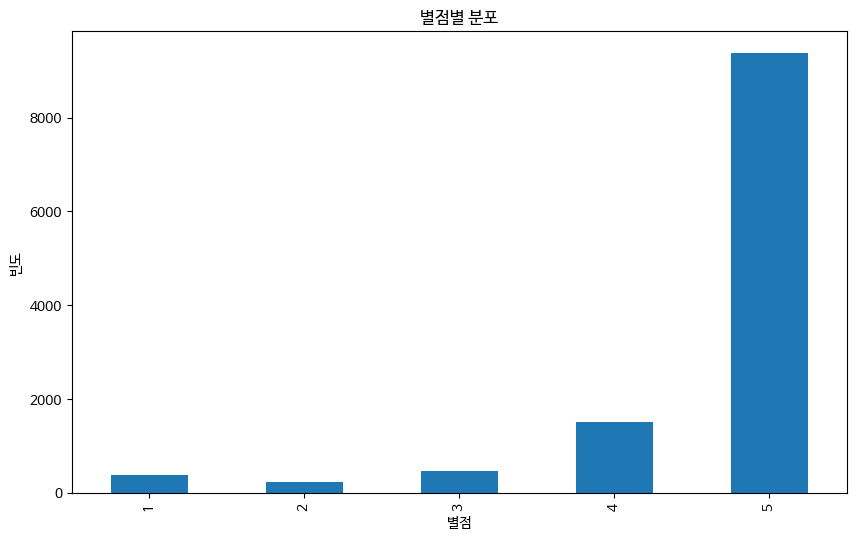

In [ ]:
# 별점 분포 시각화
plt.figure(figsize=(10, 6))
star_counts.plot(kind='bar')
plt.xlabel('별점')
plt.ylabel('빈도')
plt.title('별점별 분포')
plt.show()

# 리뷰 시각화의 경우 대부분 긴꼬리분포로 (쏠림현상) 나타남. 정규화하지 않아도 됨.

In [ ]:
# 각 상품별 긍정 및 부정 빈도수 계산
df_clean['긍정 빈도수'] = df_clean['review_assessment'].apply(lambda x: x.count('긍정'))
df_clean['부정 빈도수'] = df_clean['review_assessment'].apply(lambda x: x.count('부정'))


# 전체 긍정 및 부정 빈도수 계산
total_positive = df_clean['긍정 빈도수'].sum()
total_negative = df_clean['부정 빈도수'].sum()

print(f"전체 긍정 댓글 수: {total_positive}")
print(f"전체 부정 댓글 수: {total_negative}")


전체 긍정 댓글 수: 10891
전체 부정 댓글 수: 1060


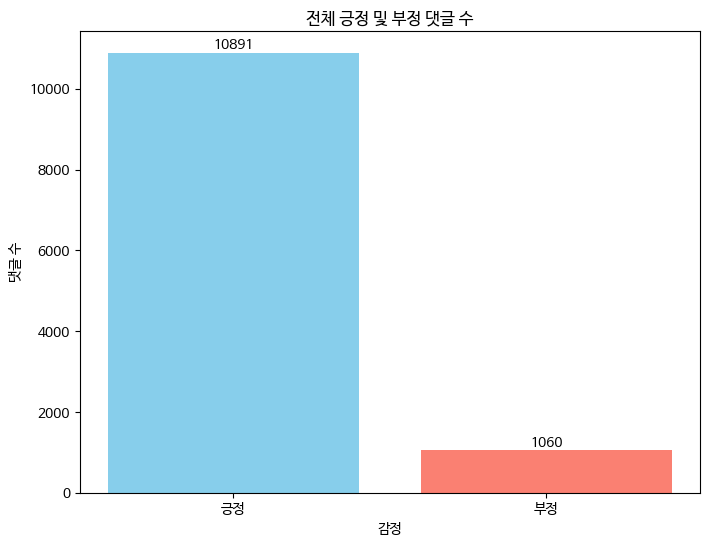

In [ ]:
# 히스토그램 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(['긍정', '부정'], [total_positive, total_negative], color=['skyblue', 'salmon'])
plt.title('전체 긍정 및 부정 댓글 수')
plt.xlabel('감정')
plt.ylabel('댓글 수')

# 빈도수 텍스트 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

plt.show()

In [ ]:
def extract_price(price_str):
    try:
        # 정규 표현식을 사용하여 숫자 부분만 추출
        price = re.findall(r'\d+', price_str.replace(',', ''))[0]
        return int(price)
    except IndexError:
        # 숫자를 찾지 못하면 NaN 반환
        return float('nan')

# 가격 데이터 정제
df_clean['가격'] = df_clean['가격'].apply(extract_price)
df_clean['가격']

1       1391
2       1125
3      25785
4      16411
5       1391
       ...  
286     1402
287     1402
288    36215
289    11496
290     1455
Name: 가격, Length: 270, dtype: int64

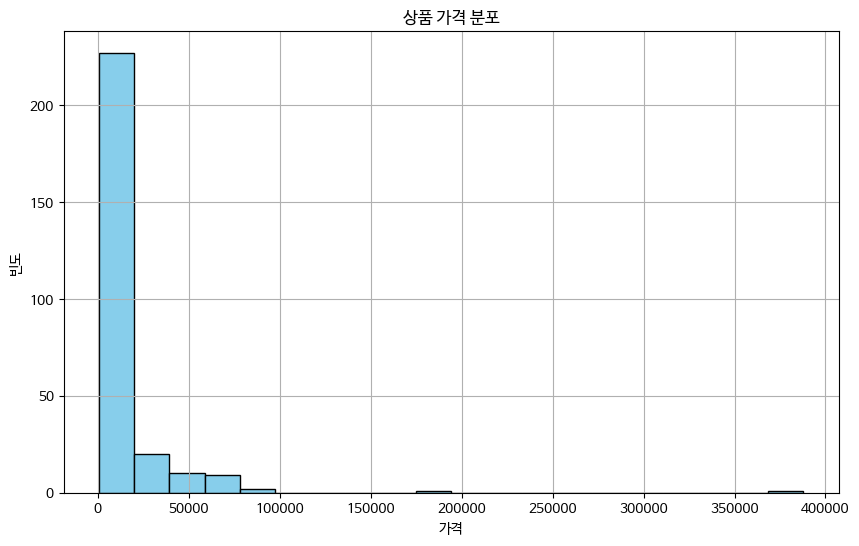

In [ ]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(df_clean['가격'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('가격')
plt.ylabel('빈도')
plt.title('상품 가격 분포')
plt.grid(True)
plt.show()

In [ ]:
df_clean.head(3)

,상품명,가격,평점,댓글,별점,링크,star_list,review_assessment,긍정 빈도수,부정 빈도수
1,"역도 스트랩 실리콘 리프팅 손목 스트랩, 미끄럼 방지, 힘 훈련, 데드리프트 크로스...",1391,4.8,배송은 생각보다 빨리도착했네요 손목 스트랩 1쌍~레드 디자인 이쁘고 마감처리 깔끔하...,5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5\n5...,https://ko.aliexpress.com/item/100500592457862...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍...",39,4
2,"야외 캠핑 생존 랜야드 낙하산 로프 하이킹 텐트 액세서리, 7 코어 550 파라코드...",1125,4.7,감사합니다\n지퍼 손잡이 매듭용으로 좋습니다\n잘받았습니다 잘받았습니다\n이색인줄은...,5\n5\n5\n5\n5\n5\n5\n3\n5\n5\n5\n5\n4\n5\n4\n5...,https://ko.aliexpress.com/item/100500522141320...,"[5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 4, 5, 4, ...","[긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 부정, 긍정, 긍정, 긍정, 긍...",42,1
3,"접이식 대용량 접이식 왜건, 휴대용 유틸리티 카트, 쇼핑 비치 가든 풀 트롤리, 야...",25785,4.7,뭔 배송하면서 바닷물에 담궈서 가져오냐? 쓰기도 전에 녹슬어서 오는 메이드인 차이나...,5\n5\n5\n5\n5\n5\n4\n4\n5\n5\n5\n5\n5\n5\n5\n4...,https://ko.aliexpress.com/item/100500593200533...,"[5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, ...","[긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍정, 긍...",43,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 1 to 290
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   상품명                270 non-null    object 
 1   가격                 270 non-null    int64  
 2   평점                 270 non-null    float64
 3   댓글                 270 non-null    object 
 4   별점                 270 non-null    object 
 5   링크                 270 non-null    object 
 6   star_list          270 non-null    object 
 7   review_assessment  270 non-null    object 
 8   긍정 빈도수             270 non-null    int64  
 9   부정 빈도수             270 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 23.2+ KB


In [ ]:
len(df_clean['댓글'])

270

In [ ]:
len(df_clean['별점'])

270

In [ ]:
df_clean['댓글'] = df_clean['댓글'].str.split('\n')

In [ ]:
# 확장된 데이터프레임 생성
expanded_rows = []
for idx, row in df_clean.iterrows():
    stars = row['star_list']
    comments = row['댓글']
    reviews = row['review_assessment']
    for star, comment, review in zip(stars, comments, reviews):
        expanded_rows.append({
            '상품명': row['상품명'],
            '댓글': comment,
            '가격': row['가격'],
            '별점': star,
            'review_list': review
        })

df_expanded = pd.DataFrame(expanded_rows)
df_expanded

,상품명,댓글,가격,별점,review_list
0,"역도 스트랩 실리콘 리프팅 손목 스트랩, 미끄럼 방지, 힘 훈련, 데드리프트 크로스...",배송은 생각보다 빨리도착했네요 손목 스트랩 1쌍~레드 디자인 이쁘고 마감처리 깔끔하...,1391,5,긍정
1,"역도 스트랩 실리콘 리프팅 손목 스트랩, 미끄럼 방지, 힘 훈련, 데드리프트 크로스...",배송 빠르고 색상 디자인 마감처리 깔끔하니 가성비 좋아요 만족합니다 강력 추천~~ㅋ,1391,5,긍정
2,"역도 스트랩 실리콘 리프팅 손목 스트랩, 미끄럼 방지, 힘 훈련, 데드리프트 크로스...",정말 좋습니다. 기대이상인듯. 2~3만원대 WSF나 Schiek의 리프팅 스트랩에 ...,1391,5,긍정
3,"역도 스트랩 실리콘 리프팅 손목 스트랩, 미끄럼 방지, 힘 훈련, 데드리프트 크로스...",3개중에 한개는 포장이 열린 상태로 왔습니다 하지만 상품에는 아무 문제 없고 미끄럼...,1391,5,긍정
4,"역도 스트랩 실리콘 리프팅 손목 스트랩, 미끄럼 방지, 힘 훈련, 데드리프트 크로스...",아 배송은 8일 걸려서 배송지연으로 배송무료 쿠폰 받았습니다.,1391,5,긍정
...,...,...,...,...,...
7445,"OTG USB 3.0 to C타입 어댑터, USB 암 to C타입 수 고속 충전 어...",좋아요.,1455,5,긍정
7446,"OTG USB 3.0 to C타입 어댑터, USB 암 to C타입 수 고속 충전 어...",꼽았는데 반응이 전혀읍네…뽑기실패…꼽았는데 반응이 전혀읍네…뽑기실패…꼽았는데 반응이...,1455,5,긍정
7447,"OTG USB 3.0 to C타입 어댑터, USB 암 to C타입 수 고속 충전 어...",감사합니다 잘 쓰겠습니다,1455,5,긍정
7448,"OTG USB 3.0 to C타입 어댑터, USB 암 to C타입 수 고속 충전 어...",좋아요 잘 쓰겠습니다.,1455,5,긍정


In [ ]:
len(df_expanded['댓글'])

7450

In [ ]:
len(df_expanded['별점'])

7450

리뷰 평점 4 ~ 5점 리뷰는 대부분 긍정적
1 ~ 3점 리뷰에서는 부정

4점, 5점인 리뷰는 "긍정적인 리뷰"로 분류하여 1를 부여
1 ~ 3점 리뷰는 "부정적인 리뷰"로 분류하여 0을 부여

# 정규 표현식 적용

In [ ]:
# 정규 표현식 함수 정의

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [ ]:
df_expanded['댓글'][1]

'배송 빠르고 색상 디자인 마감처리 깔끔하니 가성비 좋아요 만족합니다 강력 추천~~ㅋ'

In [ ]:
# apply_regular_expression() 함수를 데이터프레임의 각 행에 적용
df_expanded['댓글'] = df_expanded['댓글'].apply(apply_regular_expression)

# 한국어 형태소 분석 - 명사 단위
- 명사 형태소 추출

In [ ]:
okt = Okt()
nouns = okt.nouns(apply_regular_expression(df_expanded['댓글'][1]))
nouns

['배송', '색상', '디자인', '마감', '처리', '가성', '비', '강력', '추천']

In [ ]:
nouns_counter = Counter(nouns)
nouns_counter

Counter({'배송': 1,
         '색상': 1,
         '디자인': 1,
         '마감': 1,
         '처리': 1,
         '가성': 1,
         '비': 1,
         '강력': 1,
         '추천': 1})

In [ ]:
# 말뭉치 생성
corpus = "".join(df_expanded['댓글'].tolist())
corpus

'배송은 생각보다 빨리도착했네요 손목 스트랩 쌍레드 디자인 이쁘고 마감처리 깔끔하고 스트랩 로고처리로 고급져보이네요 스트랩에 미끄럽지 않게 미끄렁방지 처리까지 되어있네요 저렴하게 구매할수 있어 정말 만족합니다 강력 추천하고 싶네요 ㅋ배송 빠르고 색상 디자인 마감처리 깔끔하니 가성비 좋아요 만족합니다 강력 추천ㅋ정말 좋습니다 기대이상인듯 만원대 나 의 리프팅 스트랩에 비교해도 기능성으로는 전혀 문제가 없을듯합니다 착용감은 좋은데 사용전이라 장시간 사용했을때 실리콘이 안떨어지길 바래봅니다 아 바느질은 좀 거친감이 있습니다개중에 한개는 포장이 열린 상태로 왔습니다 하지만 상품에는 아무 문제 없고 미끄럼방지 처리도 깔끔하게 잘 되어있어서 가성비 너무 좋게 잘 샀습니다아 배송은 일 걸려서 배송지연으로 배송무료 쿠폰 받았습니다아주 고퀄은 아니지만 스트랩이란건 튼튼하면 그만이니 이 가격은 아주아주 혜자 깔별로 사모으는것도 재밋을듯요한번에 다왔습니다 배송이 조금 늦어져서 쿠폰도 받고 했지만 그래도 안전하게 배송 잘왔습니다 주문하실때 여러번 나눠서 주문하면 통관하는데 오래 걸리는듯 합니다 잘왔습니다 잘쓰겠습니다저렴해서 기대 안했는데 미끄럼 방지도 돼있네요 좋아요배송은 조금 느리지만 상품은 좋습니다좋습니다 좋겠습니다 좋으네 좋아요좋아용매우 만족합니다 좋아요배송도빠르고 저렴하고좋습니다 ㅎㅎ좋습니다가격 저렴하고 쓸만합니다가격대비 품질 좋은 편 내구성은 오래 안 써봐서 아직 모름 마프 스트랩 썼었는데 마프꺼보다 쿠션은 훨씬 말랑하고 스트랩은 얇은 편 완전 면 재질은 아님 그래도 가격대비 이 정도면 만족 사용성만 좋으면 여기로 정착할 듯 개인적으로 미끄럼방지 고무가 바벨 쪽이 아니라 손에 있었으면 좋았을 듯 원래 손 쪽에 있는 거라던데대만족입니다싸고 좋다 그냥 사라품질이 좋아 바벨과 닿는면에 실리콘 처리까지 되어있고 손목에는 쿠션도 있다테무보다 저렴하다 좋은 브랜드라고 생각한다생각보다 아주 좋네요저렴하고 너무좋습니다데드리프트할때 좋아요초보자들이 사용하기 적합하단다아 괜찮습니다좋아요좀 

In [ ]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'배송은 생각보다 빨리도착했네요 손목 스트랩 쌍레드 디자인 이쁘고 마감처리 깔끔하고 스트랩 로고처리로 고급져보이네요 스트랩에 미끄럽지 않게 미끄렁방지 처리까지 되어있네요 저렴하게 구매할수 있어 정말 만족합니다 강력 추천하고 싶네요 ㅋ배송 빠르고 색상 디자인 마감처리 깔끔하니 가성비 좋아요 만족합니다 강력 추천ㅋ정말 좋습니다 기대이상인듯 만원대 나 의 리프팅 스트랩에 비교해도 기능성으로는 전혀 문제가 없을듯합니다 착용감은 좋은데 사용전이라 장시간 사용했을때 실리콘이 안떨어지길 바래봅니다 아 바느질은 좀 거친감이 있습니다개중에 한개는 포장이 열린 상태로 왔습니다 하지만 상품에는 아무 문제 없고 미끄럼방지 처리도 깔끔하게 잘 되어있어서 가성비 너무 좋게 잘 샀습니다아 배송은 일 걸려서 배송지연으로 배송무료 쿠폰 받았습니다아주 고퀄은 아니지만 스트랩이란건 튼튼하면 그만이니 이 가격은 아주아주 혜자 깔별로 사모으는것도 재밋을듯요한번에 다왔습니다 배송이 조금 늦어져서 쿠폰도 받고 했지만 그래도 안전하게 배송 잘왔습니다 주문하실때 여러번 나눠서 주문하면 통관하는데 오래 걸리는듯 합니다 잘왔습니다 잘쓰겠습니다저렴해서 기대 안했는데 미끄럼 방지도 돼있네요 좋아요배송은 조금 느리지만 상품은 좋습니다좋습니다 좋겠습니다 좋으네 좋아요좋아용매우 만족합니다 좋아요배송도빠르고 저렴하고좋습니다 ㅎㅎ좋습니다가격 저렴하고 쓸만합니다가격대비 품질 좋은 편 내구성은 오래 안 써봐서 아직 모름 마프 스트랩 썼었는데 마프꺼보다 쿠션은 훨씬 말랑하고 스트랩은 얇은 편 완전 면 재질은 아님 그래도 가격대비 이 정도면 만족 사용성만 좋으면 여기로 정착할 듯 개인적으로 미끄럼방지 고무가 바벨 쪽이 아니라 손에 있었으면 좋았을 듯 원래 손 쪽에 있는 거라던데대만족입니다싸고 좋다 그냥 사라품질이 좋아 바벨과 닿는면에 실리콘 처리까지 되어있고 손목에는 쿠션도 있다테무보다 저렴하다 좋은 브랜드라고 생각한다생각보다 아주 좋네요저렴하고 너무좋습니다데드리프트할때 좋아요초보자들이 사용하기 적합하단다아 괜찮습니다좋아요좀 

In [ ]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)


['배송', '생각', '도착', '손목', '스트랩', '쌍', '레드', '디자인', '마감', '처리', '스트랩', '로고', '처리', '고급', '스트랩', '미끄렁방', '처리', '구매', '정말', '강력', '추천', '배송', '색상', '디자인', '마감', '처리', '가성', '비', '강력', '추천', '정말', '이상인', '듯', '만원', '나', '의', '리프', '팅', '스트랩', '비교', '기능', '전혀', '문제', '착용', '사용', '전이', '장시간', '사용', '때', '실리콘', '바', '바느질', '좀', '감', '개중', '개', '포장', '상태', '상품', '아무', '문제', '미끄럼', '방지', '처리', '가성', '비', '배송', '일', '배송', '지연', '배송', '무료', '쿠폰', '아주', '퀄', '스트랩', '건', '만이', '이', '가격', '혜자', '별로', '사', '재밋', '듯', '한번', '배송', '조금', '쿠폰', '배송', '주문', '때', '번', '주문', '통관', '기대', '미끄럼', '방지', '배송', '조금', '상품', '매우', '배송', '가격', '가격', '대비', '품질', '편', '구성은', '안', '모름', '마프', '스트랩', '마프', '쿠션', '스트랩', '편', '완전', '면', '재질', '가격', '대비', '이', '정도', '만족', '사용성', '여기', '정착', '듯', '개인', '미끄럼', '방지', '고무', '바벨', '쪽', '손', '듯', '원래', '손', '쪽', '거', '던데', '만족', '그냥', '사라', '품질', '바벨', '실리콘', '처리', '손목', '쿠션', '무', '브랜드', '생각', '생각', '아주', '데드리프트', '때', '초보자', '사용', '좀', '길', '사용', '아주', '아주', '가격', '이', '퀄리티', '

In [ ]:
# 빈도 탐색
counter = Counter(nouns)

In [ ]:
counter.most_common(200)

[('배송', 1488),
 ('가격', 1361),
 ('사용', 1101),
 ('제품', 1072),
 ('대비', 613),
 ('구매', 558),
 ('생각', 530),
 ('가성', 501),
 ('아주', 433),
 ('굿', 429),
 ('비', 425),
 ('충전', 399),
 ('작동', 374),
 ('것', 363),
 ('좀', 342),
 ('도착', 315),
 ('정도', 299),
 ('개', 297),
 ('추천', 293),
 ('때', 280),
 ('더', 275),
 ('성비', 251),
 ('상품', 244),
 ('매우', 242),
 ('최고', 226),
 ('이', 225),
 ('품질', 224),
 ('구입', 223),
 ('거', 219),
 ('성능', 214),
 ('조금', 211),
 ('만족', 211),
 ('주문', 199),
 ('용', 199),
 ('연결', 198),
 ('일', 197),
 ('함', 178),
 ('그냥', 177),
 ('정말', 176),
 ('포장', 175),
 ('키', 174),
 ('수', 170),
 ('게임', 154),
 ('듯', 147),
 ('사진', 145),
 ('알리', 141),
 ('맘', 140),
 ('사이즈', 138),
 ('소리', 138),
 ('음질', 138),
 ('안', 135),
 ('인식', 135),
 ('문제', 133),
 ('속도', 131),
 ('이상', 129),
 ('케이블', 127),
 ('상태', 125),
 ('하나', 124),
 ('일단', 121),
 ('보드', 121),
 ('마음', 120),
 ('물건', 120),
 ('후', 119),
 ('화면', 113),
 ('완전', 112),
 ('크기', 112),
 ('기능', 109),
 ('케이스', 108),
 ('진짜', 107),
 ('느낌', 106),
 ('설명', 106),
 ('설치', 105),
 ('

In [ ]:
most_common_noun = counter.most_common(200)

In [ ]:
#한글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(200)

[('배송', 1488),
 ('가격', 1361),
 ('사용', 1101),
 ('제품', 1072),
 ('대비', 613),
 ('구매', 558),
 ('생각', 530),
 ('가성', 501),
 ('아주', 433),
 ('충전', 399),
 ('작동', 374),
 ('도착', 315),
 ('정도', 299),
 ('추천', 293),
 ('성비', 251),
 ('상품', 244),
 ('매우', 242),
 ('최고', 226),
 ('품질', 224),
 ('구입', 223),
 ('성능', 214),
 ('조금', 211),
 ('만족', 211),
 ('주문', 199),
 ('연결', 198),
 ('그냥', 177),
 ('정말', 176),
 ('포장', 175),
 ('게임', 154),
 ('사진', 145),
 ('알리', 141),
 ('사이즈', 138),
 ('소리', 138),
 ('음질', 138),
 ('인식', 135),
 ('문제', 133),
 ('속도', 131),
 ('이상', 129),
 ('케이블', 127),
 ('상태', 125),
 ('하나', 124),
 ('일단', 121),
 ('보드', 121),
 ('마음', 120),
 ('물건', 120),
 ('화면', 113),
 ('완전', 112),
 ('크기', 112),
 ('기능', 109),
 ('케이스', 108),
 ('진짜', 107),
 ('느낌', 106),
 ('설명', 106),
 ('설치', 105),
 ('퀄리티', 103),
 ('요가', 102),
 ('디자인', 101),
 ('한국', 99),
 ('다른', 98),
 ('마감', 97),
 ('부분', 96),
 ('전이', 94),
 ('처음', 94),
 ('후기', 92),
 ('블루투스', 92),
 ('시간', 91),
 ('다만', 89),
 ('만원', 88),
 ('배터리', 88),
 ('테스트', 87),
 ('약간', 86),
 ('쓰기',

# 불용어 사전 및 삭제

In [ ]:
# 불용어 사전들을 합친 파일을 통해 1차 정제
with open("./combined_word_list.txt", 'r', encoding='utf-8') as file:
    stopwords =[line.strip() for line in file.readlines()]


In [ ]:
# 불용어 사전 추가
vehicles_stopwords = ['매우','완전','약간','바로','일만','때문','사서','작고','이건','이번','기존','보임','모조건','전혀','이정', '듭니', '그냥', '다만', '부분', '약간', '다시', '일단', '다른']
for word in vehicles_stopwords:
    stopwords.append(word)

# Word Count
- BoW 벡터 생성

In [ ]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

In [ ]:
vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df_expanded['댓글'].tolist())
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)

In [ ]:
# 단어 리스트
word_list

array(['가갹', '가게', '가겍', ..., '힘껏', '힙니', '힙해'], dtype=object)

In [ ]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([1, 2, 1, ..., 1, 1, 1])

In [ ]:
bow_vect.shape

(7450, 4695)

In [ ]:
# "단어" - "총 등장 횟수" Matching

In [ ]:
word_count_dict = dict(zip(word_list, count_list))

In [ ]:
df_clean_comp = pd.DataFrame(word_count_dict.items(), columns=['명사','빈도'])


In [ ]:
df_clean_comp.sort_values('빈도', ascending=False, inplace = True)

In [ ]:
df_clean_comp.reset_index(drop=True, inplace=True)


In [ ]:
df_review_count = df_clean_comp[0:201]
df_review_count

,명사,빈도
0,배송,1490
1,가격,1361
2,사용,1103
3,제품,1073
4,가성,728
...,...,...
196,코인,27
197,기계,27
198,다이소,27
199,이제,27


In [ ]:
# '긍정'과 '부정'의 카운트를 저장할 변수 초기화
positive_count = 0
negative_count = 0

# '긍정'과 '부정'을 카운트하는 반복문
for sentiment in df_expanded['review_list']:
    if sentiment == '긍정':
        positive_count += 1
    elif sentiment == '부정':
        negative_count += 1

# 결과 출력
print("긍정 리뷰 개수:", positive_count)
print("부정 리뷰 개수:", negative_count)

# DataFrame을 재구성하여 '긍정'과 '부정' 리뷰의 단어 빈도를 함께 확인
df_review_count = pd.DataFrame({'Word': word_list, 'Total_Count': count_list})
df_review_count['Positive_Count'] = 0
df_review_count['Negative_Count'] = 0

# '긍정'과 '부정' 리뷰에서의 단어 빈도를 계산하여 DataFrame에 반영
for index, row in df_expanded.iterrows():
    sentiment = row['review_list']
    comment = row['댓글']
    cleaned_comment = text_cleaning(comment)
    for word in cleaned_comment:
        if sentiment == '긍정':
            df_review_count.loc[df_review_count['Word'] == word, 'Positive_Count'] += 1
        elif sentiment == '부정':
            df_review_count.loc[df_review_count['Word'] == word, 'Negative_Count'] += 1

# 결과 확인
print(df_review_count.head())


긍정 리뷰 개수: 6676
부정 리뷰 개수: 774
  Word  Total_Count  Positive_Count  Negative_Count
0   가갹            1               1               0
1   가게            2               2               0
2   가겍            1               1               0
3   가격         1361            1162             199
4   가구            1               1               0


In [ ]:
# 단어 빈도 사전 생성
word_count_dict = dict(zip(word_list, count_list))
df_clean_comp = pd.DataFrame(word_count_dict.items(), columns=['명사', '빈도'])
df_clean_comp.sort_values('빈도', ascending=False, inplace=True)
df_clean_comp.reset_index(drop=True, inplace=True)
df_clean_comp

,명사,빈도
0,배송,1490
1,가격,1361
2,사용,1103
3,제품,1073
4,가성,728
...,...,...
4690,흐세,1
4691,흑백영화,1
4692,흘게,1
4693,가라지,1


In [ ]:
# 긍정/부정 댓글을 추출합니다
positive_comments = df_expanded[df_expanded['review_list'] == '긍정']['댓글'].tolist()
negative_comments = df_expanded[df_expanded['review_list'] == '부정']['댓글'].tolist()

# 긍정/부정 댓글에 대한 CountVectorizer 인스턴스를 생성합니다
vect_positive = CountVectorizer(tokenizer=lambda x: text_cleaning(x))
vect_negative = CountVectorizer(tokenizer=lambda x: text_cleaning(x))

# 긍정/부정 댓글을 피팅하고 변환합니다
bow_vect_positive = vect_positive.fit_transform(positive_comments)
bow_vect_negative = vect_negative.fit_transform(negative_comments)

# 긍정/부정 댓글에 대한 피처 이름(단어)를 가져옵니다
word_list_positive = vect_positive.get_feature_names_out()
word_list_negative = vect_negative.get_feature_names_out()

# 긍정/부정 댓글에 대한 단어 카운트를 합산합니다
count_list_positive = bow_vect_positive.toarray().sum(axis=0)
count_list_negative = bow_vect_negative.toarray().sum(axis=0)

# 긍정/부정 댓글에 대한 단어 카운트 딕셔너리를 생성합니다
word_count_dict_positive = dict(zip(word_list_positive, count_list_positive))
word_count_dict_negative = dict(zip(word_list_negative, count_list_negative))

# 긍정/부정 댓글에 대한 데이터프레임을 생성합니다
df_positive = pd.DataFrame(word_count_dict_positive.items(), columns=['단어', '긍정_빈도'])
df_negative = pd.DataFrame(word_count_dict_negative.items(), columns=['단어', '부정_빈도'])

# 긍정/부정 댓글에 대한 단어 카운트를 병합합니다
df_review_count = pd.merge(df_positive, df_negative, on='단어', how='outer').fillna(0)

# 총 빈도수(긍정 + 부정)를 기준으로 정렬합니다
df_review_count['빈도'] = df_review_count['긍정_빈도'] + df_review_count['부정_빈도']
df_review_count.sort_values('빈도', ascending=False, inplace=True)

# 인덱스를 재설정합니다
df_review_count.reset_index(drop=True, inplace=True)

# 데이터프레임을 출력합니다
df_review_count


,단어,긍정_빈도,부정_빈도,빈도
0,배송,1388.0,102.0,1490.0
1,가격,1162.0,199.0,1361.0
2,사용,1047.0,56.0,1103.0
3,제품,1020.0,53.0,1073.0
4,가성,677.0,51.0,728.0
...,...,...,...,...
4690,영광,1.0,0.0,1.0
4691,영사,1.0,0.0,1.0
4692,영상편집,1.0,0.0,1.0
4693,영역,1.0,0.0,1.0


In [ ]:
'''
print('전체 리뷰 수: ', len(df_expanded))

# 각 열에 대해서 중복 제외 샘플 카운팅하기

df_expanded['별점'].nunique() # number of uniqueness
# 1,2,3,4,5

df_expanded['댓글'].nunique()

df_expanded['가격'].nunique()

df_expanded['review_list'].nunique() # 긍정, 부정

# drop_duplicates()

df_expanded.drop_duplicates(subset=['댓글'], inplace=True)
# in place of ~ : 을 대신하다 >> inplace=True >> df_expanded 업데이트
# 'reviews' 열에서 중복인 내용 >> 중복 제거

print('전체 리뷰 수: ', len(df_expanded))

# 결측치 확인

df_expanded.info()

df_expanded.isnull().sum()
'''

In [ ]:
'''
# 불용어 리스트 (예시로 제공된 리스트, 필요에 따라 수정 가능)
stopwords = ['것', '수', '저', '더', '등', '들', '및', '안', '만', '앞', '년', '월', '일']

# 텍스트 전처리 함수
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

# 명사 추출 및 빈도수 계산 함수
def extract_nouns_by_sentiment(dataframe):
    """
    주어진 데이터프레임에서 댓글을 긍정과 부정으로 나누어 명사를 추출하고 빈도수까지 계산하여 저장합니다.

    Parameters:
    dataframe (pd.DataFrame): 댓글, 리뷰 상태를 포함한 데이터프레임
    """
    # 명사와 빈도를 저장할 리스트 초기화
    combined_nouns = []

    # 긍정 댓글과 부정 댓글을 나눔
    positive_reviews = dataframe[dataframe['review_list'] == '긍정']['댓글'].dropna()
    negative_reviews = dataframe[dataframe['review_list'] == '부정']['댓글'].dropna()

    # 긍정 댓글을 하나의 문자열로 합침
    if not positive_reviews.empty:
        positive_comments_combined = ' '.join(positive_reviews)
        # 긍정 댓글에서 명사 추출 및 전처리
        positive_nouns = text_cleaning(positive_comments_combined)
        # 명사 빈도 계산
        positive_wordcount = Counter(positive_nouns)
        combined_nouns.extend([(noun, freq, '긍정') for noun, freq in positive_wordcount.items()])

    # 부정 댓글을 하나의 문자열로 합침
    if not negative_reviews.empty:
        negative_comments_combined = ' '.join(negative_reviews)
        # 부정 댓글에서 명사 추출 및 전처리
        negative_nouns = text_cleaning(negative_comments_combined)
        # 명사 빈도 계산
        negative_wordcount = Counter(negative_nouns)
        combined_nouns.extend([(noun, freq, '부정') for noun, freq in negative_wordcount.items()])

    # 명사 리스트를 데이터프레임으로 변환
    nouns_df = pd.DataFrame(combined_nouns, columns=['명사', '빈도', 'review_list'])

    # 명사 데이터프레임을 CSV 파일로 저장
    nouns_df.to_csv('nouns_with_freq.csv', index=False, encoding='utf-8-sig')

    return nouns_df

# 예시 데이터프레임 (df_expanded)를 사용하여 함수 호출
nouns_df = extract_nouns_by_sentiment(df_expanded)

# 결과 출력
print("\n알리익스프레스 명사 추출 및 빈도수 결과 데이터프레임:")
print(nouns_df)
'''


In [ ]:
from collections import Counter

# 불용어 리스트
stopwords = ['것', '수', '저', '더', '등', '들', '및', '안', '만', '앞', '년', '월', '일']

# 텍스트 전처리 함수
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

# 명사 추출 및 빈도수 계산 함수
def extract_nouns(df_review_count):
    """
    주어진 데이터프레임에서 명사를 추출하고 빈도수를 계산하여 저장합니다.

    Parameters:
    df_review_count (pd.DataFrame): 단어와 빈도수가 포함된 데이터프레임
    """
    # 명사와 빈도를 저장할 리스트 초기화
    combined_nouns = []

    # 긍정과 부정 댓글에서 명사 추출 및 빈도 계산
    for index, row in df_review_count.iterrows():
        nouns = text_cleaning(row['단어'])
        for noun in nouns:
            combined_nouns.append((noun, row['긍정_빈도'], row['부정_빈도']))  # 명사, 긍정 빈도, 부정 빈도 저장

    # 명사 리스트를 데이터프레임으로 변환
    nouns_df = pd.DataFrame(combined_nouns, columns=['명사', '긍정_빈도', '부정_빈도'])

    # 결과를 CSV 파일로 저장
    nouns_df.to_csv('nouns_with_freq.csv', index=False, encoding='utf-8-sig')

    return nouns_df

# 예시 데이터프레임 (df_review_count)을 사용하여 함수 호출
nouns_df = extract_nouns(df_review_count)

# 결과 출력
print("\n명사 추출 및 빈도수 결과 데이터프레임:")
print(nouns_df)



명사 추출 및 빈도수 결과 데이터프레임:
        명사   긍정_빈도  부정_빈도
0       배송  1388.0  102.0
1       가격  1162.0  199.0
2       사용  1047.0   56.0
3       제품  1020.0   53.0
4       가성   677.0   51.0
...    ...     ...    ...
4665    영광     1.0    0.0
4666    영사     1.0    0.0
4667  영상편집     1.0    0.0
4668    영역     1.0    0.0
4669    열쇠     1.0    0.0

[4670 rows x 3 columns]


In [ ]:
# CSV 파일 읽기
noun_df_freq = pd.read_csv("./nouns_with_freq.csv", encoding='UTF-8') ; noun_df_freq

,명사,긍정_빈도,부정_빈도
0,배송,1388.0,102.0
1,가격,1162.0,199.0
2,사용,1047.0,56.0
3,제품,1020.0,53.0
4,가성,677.0,51.0
...,...,...,...
4665,영광,1.0,0.0
4666,영사,1.0,0.0
4667,영상편집,1.0,0.0
4668,영역,1.0,0.0


In [ ]:
# 긍정_빈도 및 부정_빈도를 정수형으로 변환
noun_df_freq['긍정_빈도'] = noun_df_freq['긍정_빈도'].astype(int)
noun_df_freq['부정_빈도'] = noun_df_freq['부정_빈도'].astype(int)

In [ ]:
# TF-IDF 변환기 생성
tfidf_vectorizer = TfidfVectorizer()

# 텍스트 데이터를 TF-IDF 행렬로 변환
tfidf_matrix = tfidf_vectorizer.fit_transform(noun_df_freq['명사'])

# TF-IDF 값을 데이터프레임으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# TF-IDF 값 데이터프레임 출력
print(tfidf_df)



       가갹   가게   가겍   가격   가구   가기  가까이   가끔   가능  가능성  ...   흠집   흡수   흡입  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4665  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4666  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4667  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4668  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4669  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       흡착   흥미   희망   흰색   힌지   힘껏   힙해  
0     0.0  0.0  0.0  

KeyboardInterrupt: 

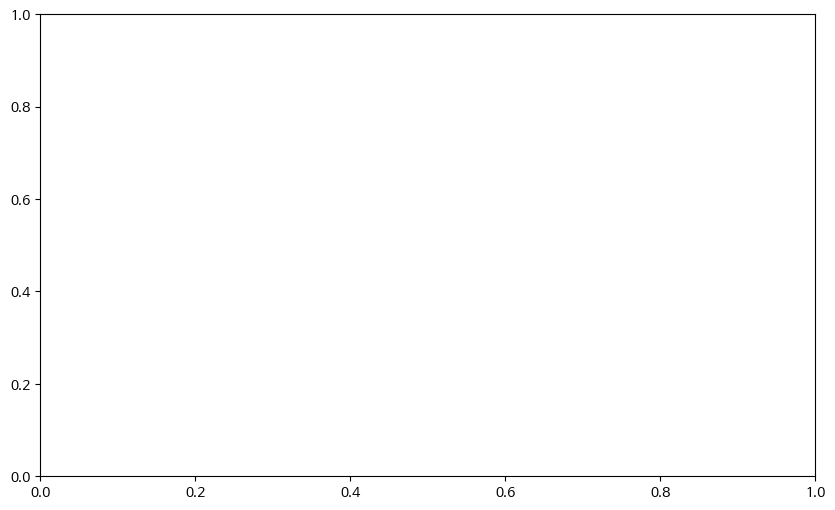

In [ ]:
# TF-IDF 값들의 평균 계산
tfidf_mean = tfidf_df.mean()

# TF-IDF 값들을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
tfidf_mean.plot(kind='bar')
plt.title('각 명사의 평균 TF-IDF 값')
plt.xlabel('명사')
plt.ylabel('TF-IDF 값')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### 연결중심성 시각화

#### 네트워크 그래프 생성 및 연결 중심성 계산

#### 긍정

In [ ]:
okt = Okt()

# 명사 추출 함수
def extract_nouns(text):
    return okt.nouns(text)

# 'review_list'가 '긍정'인 '댓글' 열에서 명사 추출하여 'nouns' 열에 적용
df_expanded.loc[df_expanded['review_list'] == '긍정', 'nouns'] = df_expanded[df_expanded['review_list'] == '긍정']['댓글'].apply(extract_nouns)


In [ ]:
# 네트워크 그래프 생성 및 연결 중심성 계산 함수
def calculate_centrality(df):
    G = nx.Graph()

    for nouns in df['nouns'].dropna():  # 결측값이 있을 수 있으므로 dropna() 추가
        for i in range(len(nouns)):
            for j in range(i + 1, len(nouns)):
                if G.has_edge(nouns[i], nouns[j]):
                    G[nouns[i]][nouns[j]]['weight'] += 1
                else:
                    G.add_edge(nouns[i], nouns[j], weight=1)

    centrality = nx.degree_centrality(G)
    centrality_df = pd.DataFrame(list(centrality.items()), columns=['명사', '연결 중심성'])
    return centrality_df, G

# 연결 중심성 계산
centrality_df, G = calculate_centrality(df_expanded)

In [ ]:
# 명사 빈도 데이터프레임 생성
nouns_df = pd.merge(centrality_df, noun_df_freq[['명사', '긍정_빈도']], on='명사', how='left')

# NaN 값을 제거합니다.
nouns_df = nouns_df.dropna(subset=['긍정_빈도'])
nouns_df.sort_values(by='긍정_빈도', ascending=False)

,명사,연결 중심성,긍정_빈도
0,배송,0.449695,1388.0
61,가격,0.438834,1162.0
34,사용,0.424924,1047.0
156,제품,0.399200,1020.0
20,가성,0.291540,677.0
...,...,...,...
5220,학생,0.004764,1.0
5221,실험,0.002477,1.0
681,사지,0.034870,0.0
806,보기,0.048018,0.0


In [ ]:
# 네트워크 그래프 생성 함수
def create_network_graph(df):
    G = nx.Graph()

    for nouns in df['nouns']:
        for i in range(len(nouns)):
            for j in range(i + 1, len(nouns)):
                if G.has_edge(nouns[i], nouns[j]):
                    G[nouns[i]][nouns[j]]['weight'] += 1
                else:
                    G.add_edge(nouns[i], nouns[j], weight=1)

    return G

def visualize_network(G, title, font_family='NanumGothic', font_size=10):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True,
            node_size=[G.degree(n) * 10 for n in G.nodes],
            node_color='skyblue', font_size=font_size, alpha=0.7)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_family=font_family, font_size=font_size)

    # 노드에 라벨 추가
    labels = {n: n for n in G.nodes()}  # 노드 값 자체를 라벨로 설정
    nx.draw_networkx_labels(G, pos, labels, font_family='NanumGothic', font_size=font_size)
    plt.title(title)
    plt.show()

In [ ]:
# 긍정과 부정 리뷰 분리
positive_reviews = df_expanded[df_expanded['review_list'] == '긍정']
negative_reviews = df_expanded[df_expanded['review_list'] == '부정']

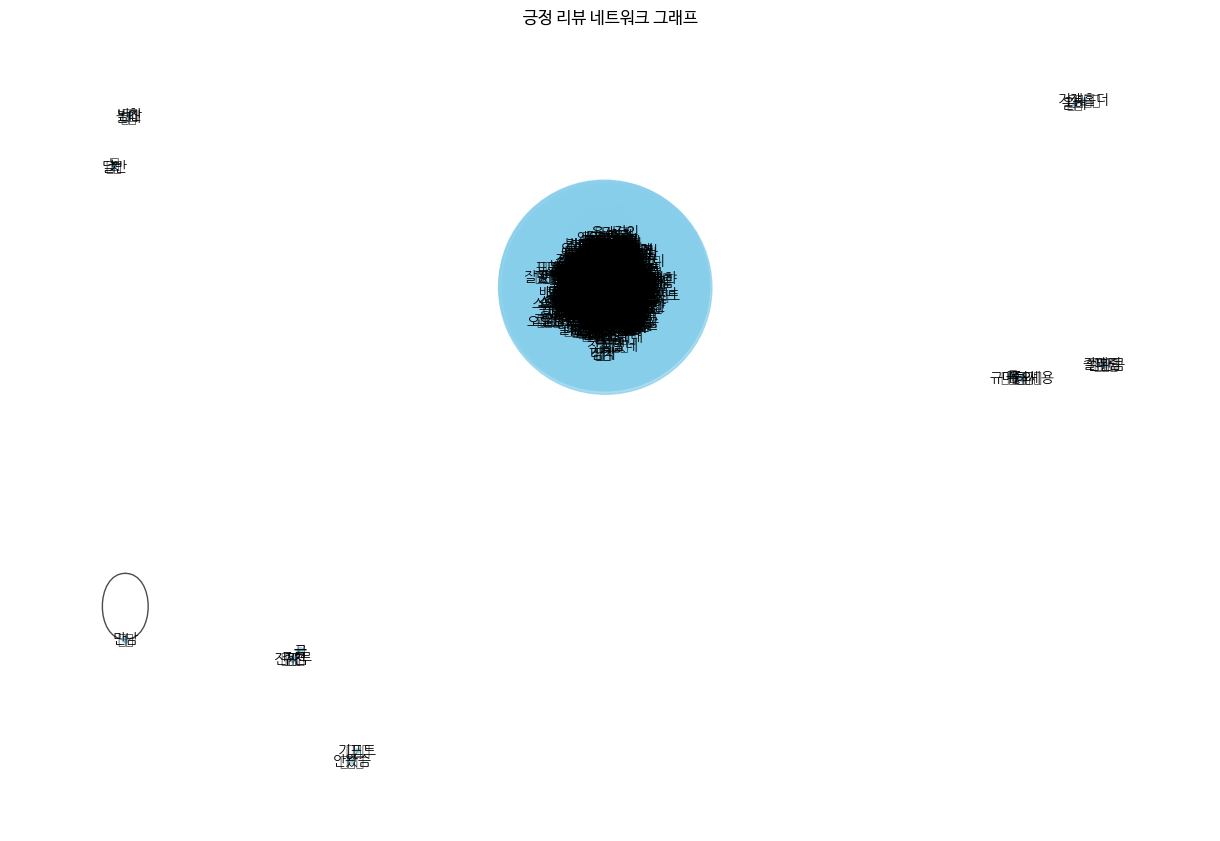

In [ ]:
# 긍정 리뷰 네트워크 그래프 생성 및 시각화
positive_graph = create_network_graph(positive_reviews)
visualize_network(positive_graph, '긍정 리뷰 네트워크 그래프')


#### 긍정 부정 네트워크 군집분석

In [ ]:
'''
!pip install python-louvain
'''

In [ ]:
# 긍정 리뷰 텍스트 가져오기
positive_reviews_text = positive_reviews['댓글']

# CountVectorizer를 사용하여 키워드 빈도 분석
vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(positive_reviews_text.tolist())
words = vect.get_feature_names_out()
word_counts = bow_vect.toarray().sum(axis=0)

# 키워드와 빈도를 DataFrame으로 정리
word_freq = pd.DataFrame(list(zip(words, word_counts)), columns=['Keyword', 'Frequency'])
word_freq = word_freq.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# 상위 200개의 키워드만 추출
top_200_keywords = word_freq.head(200)
print(top_200_keywords)


    Keyword  Frequency
0        배송       1388
1        가격       1162
2        사용       1047
3        제품       1020
4        가성        677
..      ...        ...
195      리뷰         30
196     무조건         30
197      만해         29
198      전입         29
199      교체         29

[200 rows x 2 columns]


In [ ]:
# 상위 200개 키워드 표 생성
top_200_keywords['Rank'] = range(1, 201)
top_200_keywords = top_200_keywords[['Rank', 'Keyword', 'Frequency']]

print(top_200_keywords)


     Rank Keyword  Frequency
0       1      배송       1388
1       2      가격       1162
2       3      사용       1047
3       4      제품       1020
4       5      가성        677
..    ...     ...        ...
195   196      리뷰         30
196   197     무조건         30
197   198      만해         29
198   199      전입         29
199   200      교체         29

[200 rows x 3 columns]


In [ ]:
# 출현 빈도가 높은 200개의 핵심 키워드의 연결 및 연결 강도
top_keywords = top_200_keywords['Keyword'].tolist()

# 키워드 쌍 빈도 계산
bow_vect_top = vect.transform(positive_reviews_text.tolist())
co_occurrence = (bow_vect_top.T * bow_vect_top).toarray()
np.fill_diagonal(co_occurrence, 0)  # 자기 자신과의 연관성을 0으로 설정

# 그래프 생성
G = nx.Graph()

for i in range(len(top_keywords)):
    for j in range(i + 1, len(top_keywords)):
        if co_occurrence[i, j] > 0:
            G.add_edge(top_keywords[i], top_keywords[j], weight=co_occurrence[i, j])

# 그래프 시각화
plt.figure(figsize=(60, 40))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=[G.degree(n) * 100 for n in G.nodes],
        node_color='skyblue', font_size=15, alpha=0.7, font_family='NanumGothic')

plt.title('긍정 리뷰 네트워크의 군집 분석')
plt.show()

#### 부정

In [ ]:
okt = Okt()

# 명사 추출 함수
def extract_nouns(text):
    return okt.nouns(text)

# 'review_list'가 '부정'인 '댓글' 열에서 명사 추출하여 'nouns' 열에 적용
df_expanded.loc[df_expanded['review_list'] == '부정', 'nouns'] = df_expanded[df_expanded['review_list'] == '부정']['댓글'].apply(extract_nouns)


In [ ]:
# 네트워크 그래프 생성 및 연결 중심성 계산
def calculate_centrality(df):
    G = nx.Graph()

    for nouns in df['nouns']:
        for i in range(len(nouns)):
            for j in range(i + 1, len(nouns)):
                if G.has_edge(nouns[i], nouns[j]):
                    G[nouns[i]][nouns[j]]['weight'] += 1
                else:
                    G.add_edge(nouns[i], nouns[j], weight=1)

    centrality = nx.degree_centrality(G)
    centrality_df = pd.DataFrame(list(centrality.items()), columns=['명사', '연결 중심성'])
    return centrality_df, G

# 연결 중심성 계산
centrality_df, G = calculate_centrality(df_expanded)



In [ ]:
# 명사 빈도 데이터프레임 생성
nouns_df = pd.merge(centrality_df, noun_df_freq[['명사', '부정_빈도']], on='명사', how='left')

# NaN 값을 제거합니다.
nouns_df = nouns_df.dropna(subset=['부정_빈도'])
nouns_df.sort_values(by='부정_빈도', ascending=False)


,명사,연결 중심성,부정_빈도
61,가격,0.432861,199.0
73,대비,0.207589,160.0
0,배송,0.444833,102.0
34,사용,0.415915,56.0
156,제품,0.392890,53.0
...,...,...,...
2238,안드,0.002026,0.0
2239,최초,0.002026,0.0
2241,비번,0.021183,0.0
2242,실수,0.013446,0.0


In [ ]:
# 네트워크 그래프 생성 함수
def create_network_graph(df):
    G = nx.Graph()

    for nouns in df['nouns']:
        for i in range(len(nouns)):
            for j in range(i + 1, len(nouns)):
                if G.has_edge(nouns[i], nouns[j]):
                    G[nouns[i]][nouns[j]]['weight'] += 1
                else:
                    G.add_edge(nouns[i], nouns[j], weight=1)

    return G

def visualize_network(G, title, font_family='NanumGothic', font_size=10):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True,
            node_size=[G.degree(n) * 10 for n in G.nodes],
            node_color='skyblue', font_size=font_size, alpha=0.7)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_family=font_family, font_size=font_size)

    # 노드에 라벨 추가
    labels = {n: n for n in G.nodes()}  # 노드 값 자체를 라벨로 설정
    nx.draw_networkx_labels(G, pos, labels, font_family='NanumGothic', font_size=font_size)
    plt.title(title)
    plt.show()

In [ ]:
# 긍정과 부정 리뷰 분리
positive_reviews = df_expanded[df_expanded['review_list'] == '긍정']
negative_reviews = df_expanded[df_expanded['review_list'] == '부정']

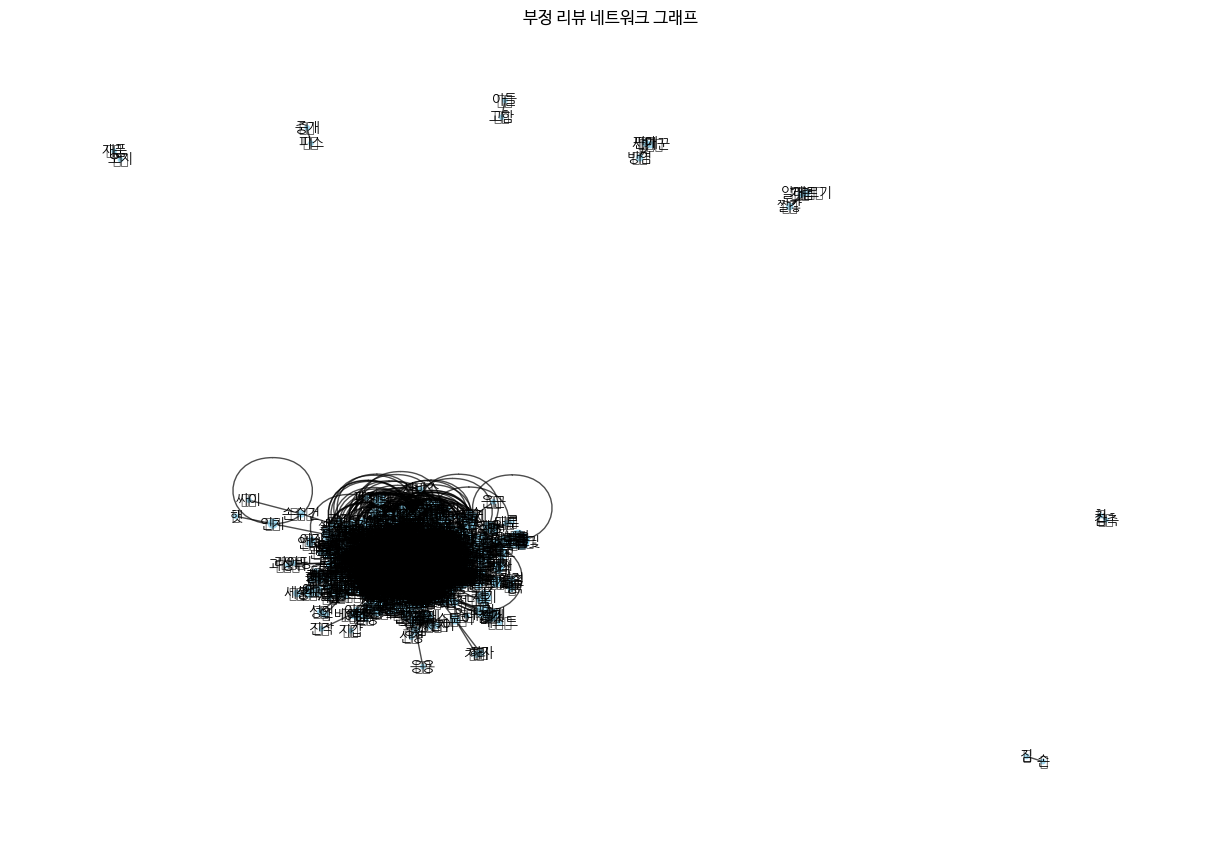

In [ ]:
# 부정 리뷰 네트워크 그래프 생성 및 시각화
negative_graph = create_network_graph(negative_reviews)
visualize_network(negative_graph, '부정 리뷰 네트워크 그래프')


#### 부정 네트워크 군집분석

In [ ]:
# 부정 리뷰 텍스트 가져오기
negative_reviews_text = negative_reviews['댓글']

# CountVectorizer를 사용하여 키워드 빈도 분석
vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(negative_reviews_text.tolist())
words = vect.get_feature_names_out()
word_counts = bow_vect.toarray().sum(axis=0)

# 키워드와 빈도를 DataFrame으로 정리
word_freq = pd.DataFrame(list(zip(words, word_counts)), columns=['Keyword', 'Frequency'])
word_freq = word_freq.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# 상위 200개의 키워드만 추출
top_200_keywords = word_freq.head(200)
top_200_keywords


,Keyword,Frequency
0,가격,199
1,대비,160
2,배송,102
3,사용,56
4,제품,53
...,...,...
195,설치,2
196,테라,2
197,테두리,2
198,발생,2


In [ ]:
# 상위 200개 키워드 표 생성
top_200_keywords['Rank'] = range(1, 201)
top_200_keywords = top_200_keywords[['Rank', 'Keyword', 'Frequency']]

top_200_keywords

,Rank,Keyword,Frequency
0,1,가격,199
1,2,대비,160
2,3,배송,102
3,4,사용,56
4,5,제품,53
...,...,...,...
195,196,설치,2
196,197,테라,2
197,198,테두리,2
198,199,발생,2


In [ ]:
# 출현 빈도가 높은 200개의 핵심 키워드의 연결 및 연결 강도
top_keywords = top_200_keywords['Keyword'].tolist()

# 키워드 쌍 빈도 계산
bow_vect_top = vect.transform(positive_reviews_text.tolist())
co_occurrence = (bow_vect_top.T * bow_vect_top).toarray()
np.fill_diagonal(co_occurrence, 0)  # 자기 자신과의 연관성을 0으로 설정

# 그래프 생성
G = nx.Graph()

for i in range(len(top_keywords)):
    for j in range(i + 1, len(top_keywords)):
        if co_occurrence[i, j] > 0:
            G.add_edge(top_keywords[i], top_keywords[j], weight=co_occurrence[i, j])

# 그래프 시각화
plt.figure(figsize=(60, 40))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=[G.degree(n) * 50 for n in G.nodes],
        node_color='skyblue', font_size=15, alpha=0.7, font_family='NanumGothic')

plt.title('부정 리뷰 네트워크의 군집 분석')
plt.show()


In [ ]:
'''
!pip install gensim
'''

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from gensim import corpora

# 토큰 리스트 생성
tokenized_reviews = df_expanded['nouns'].tolist()

# 사전 및 코퍼스 생성
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_reviews]

# 토픽 분석 위한 LDA 모델 구축
k = 4 # 토픽 개수 설정
lda_model = LdaMulticore(corpus=corpus, num_topics=k, id2word=dictionary,
                         iterations=100, passes=10, workers=10)

# 토픽 출력
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from gensim import corpora

# 토큰 리스트 생성
tokenized_reviews = df_expanded['nouns'].tolist()

# 사전 및 코퍼스 생성
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_reviews]

# 토픽 분석 위한 LDA 모델 구축
k = 4 # 토픽 개수 설정
lda_model = LdaMulticore(corpus=corpus, num_topics=k, id2word=dictionary,
                         iterations=12, passes=1, workers=10)

# 토픽 출력
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')